In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,529 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import time
import random
import math
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup


import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [154]:
df= pd.read_csv('/content/drive/MyDrive/데청캠 1조/데이터/3. 최종 데이터/품목별/ver4/풋고추_data.csv', encoding='utf-8') #euc-kr

In [155]:
ns_data=df

In [157]:
ns_data['품목']

0       풋고추
1       풋고추
2       풋고추
3       풋고추
4       풋고추
       ... 
1507    풋고추
1508    풋고추
1509    풋고추
1510    풋고추
1511    풋고추
Name: 품목, Length: 1512, dtype: object

In [158]:
#ns_data = ns_data[ns_data['품목']=='배추']
ns_data = ns_data.sort_values(by='날짜', ascending=True)
ns_data = ns_data.drop(['품목'], axis=1)
# '가격' 열의 값을 추출
original_open = ns_data['가격'].values

# 결과 출력
print(original_open)

[1161.36842105 1161.36842105 1161.36842105 ... 1044.73958333 1044.73958333
 1044.73958333]


In [159]:
# @title 기본 제목 텍스트
dates_all = pd.to_datetime(ns_data['날짜'])

# 2021-01-01을 기준으로 훈련 세트와 테스트 세트로 분리
split_date = '2021-01-01'
train_data = ns_data[ns_data['날짜'] < split_date]
test_data = ns_data[ns_data['날짜'] >= split_date]

print("Training Set:")
print(train_data)

print("\nTest Set:")
print(test_data)

print("Training Set:")
train_data_count=train_data.count()
train_data_dates = train_data['날짜']
print(train_data.count())

print("\nTest Set:")
test_data_count=test_data.count()
test_data_dates = test_data['날짜']
print(test_data.count())

# 시가 저장
original_open = ns_data['가격'].values

# plot에 사용할 날짜데이터 저장

#날짜 drop하는 부분

#ns_data = ns_data.drop(['날짜'],axis=1)

print(ns_data)

Training Set:
            가격          날짜  asos_평균_해면기압  asos_최고_해면기압  asos_최저_해면기압  \
0    1161.3684  2016-01-04        0.6711        0.6418        0.7715   
1475 1161.3684  2016-01-04        0.6711        0.6418        0.7715   
1476 1161.3684  2016-01-05        0.7504        0.7023        0.8367   
1    1161.3684  2016-01-05        0.7504        0.7023        0.8367   
2    1161.3684  2016-01-06        0.7195        0.6933        0.8027   
...        ...         ...           ...           ...           ...   
1245  879.2188  2020-12-24        0.5933        0.5417        0.7152   
1246  880.3125  2020-12-28        0.7105        0.6659        0.8079   
1247  880.3125  2020-12-29        0.6186        0.6382        0.7115   
1248  880.3125  2020-12-30        0.6404        0.6401        0.7279   
1249  881.5625  2020-12-31        0.7418        0.6949        0.8241   

      asos_합계_일조시간  asos_일조율  asos_평균_상대습도  asos_최저_상대습도  lag1_asos_평균_해면기압  \
0           0.5825    0.8269        0.4339

In [160]:
train_data_d=train_data.drop(['날짜'],axis=1)
test_data_d=test_data.drop(['날짜'],axis=1)

train_x = train_data_d.drop(['가격'],axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'],axis=1)
test_y = test_data_d['가격']

In [161]:
import lightgbm as lgb
from lightgbm import early_stopping
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
# LGBMRegressor 하이퍼파라미터 설정
lgbm_params = {
    'objective': 'regression',  # 회귀 문제의 경우
    'max_depth': 10,
    'learning_rate': 0.2,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'num_leaves': 32,
}

# XGBoost 모델 설정
xgb_params = {
    'objective': 'reg:squarederror',  # 회귀 문제의 경우
    'max_depth': 3,
    'learning_rate': 0.2,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
# 기본 회귀 모델 생성
model_xgb = XGBRegressor(**xgb_params)
model_lgb = LGBMRegressor(**lgbm_params)

# 1단계 모델 정의
base_models = [('xgb', model_xgb), ('lgbm', model_lgb)]

# 1단계 모델 학습 및 예측
y_preds = []
for model_name, model in base_models:
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)


# 예측 결과 평가 (평균 제곱 오차)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21250
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 112
[LightGBM] [Info] Start training from score 1210.591450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

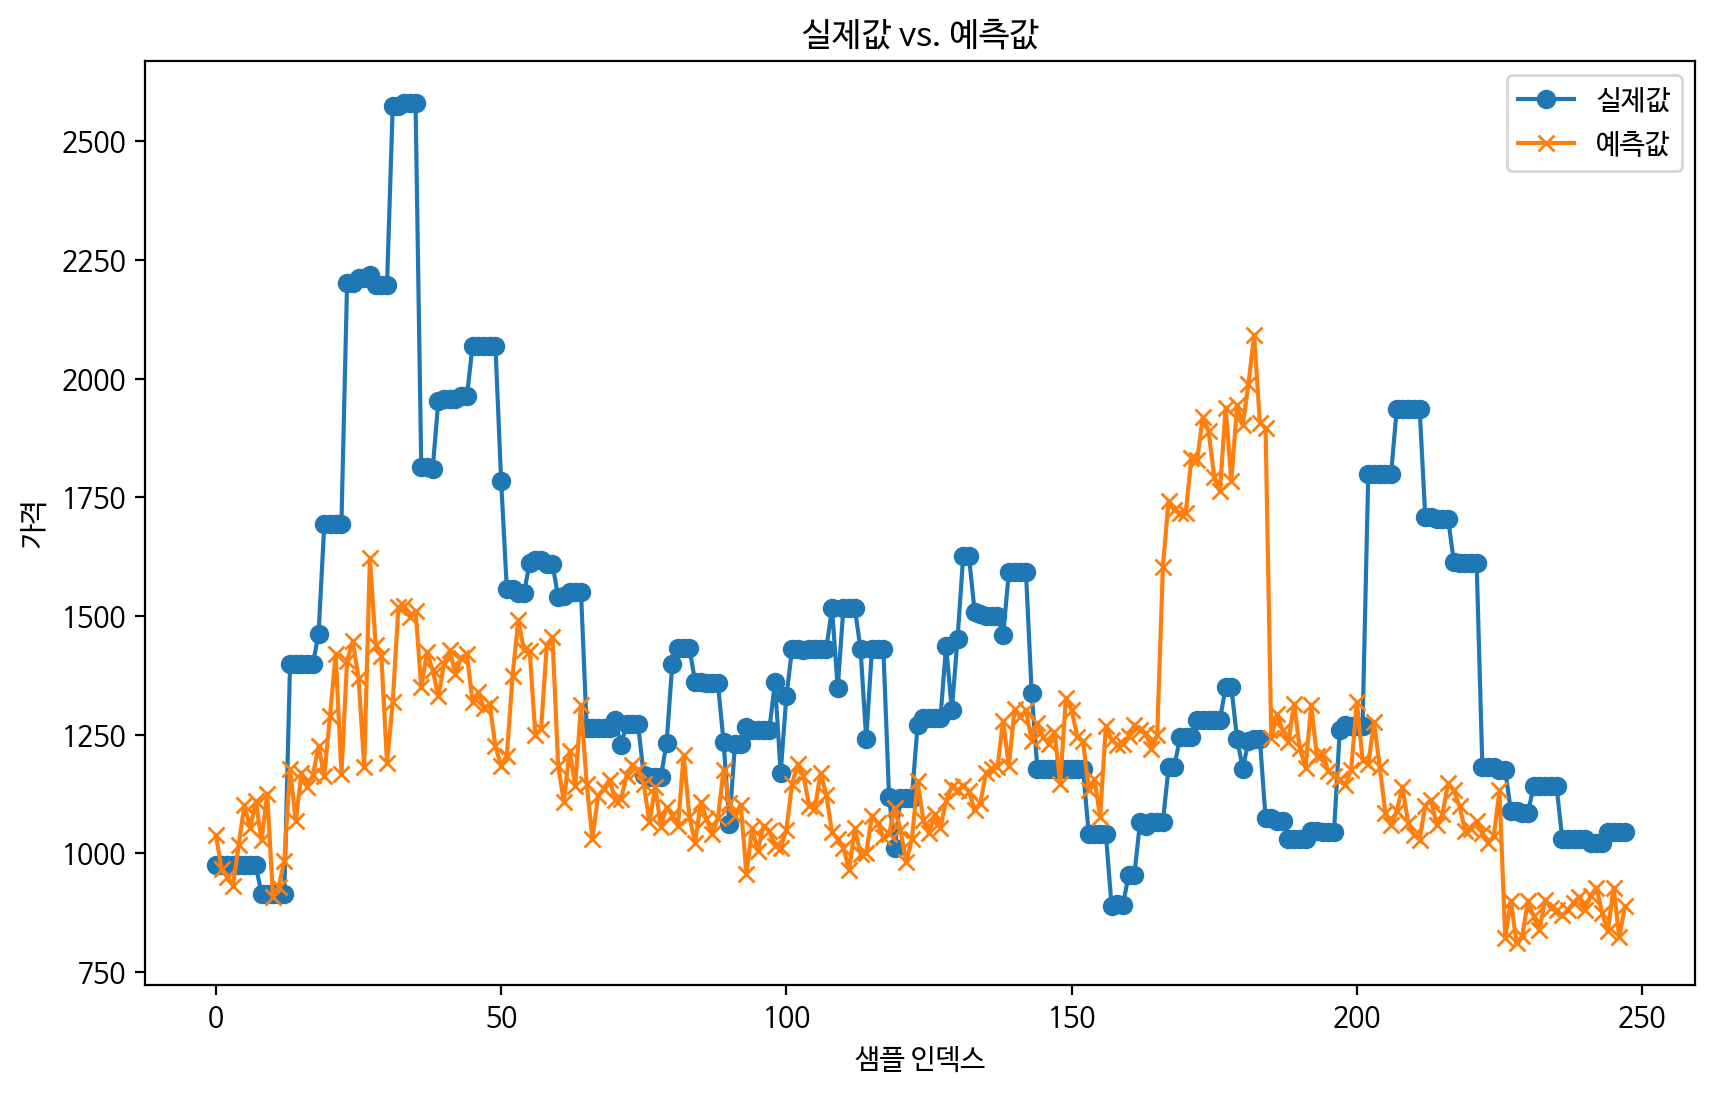

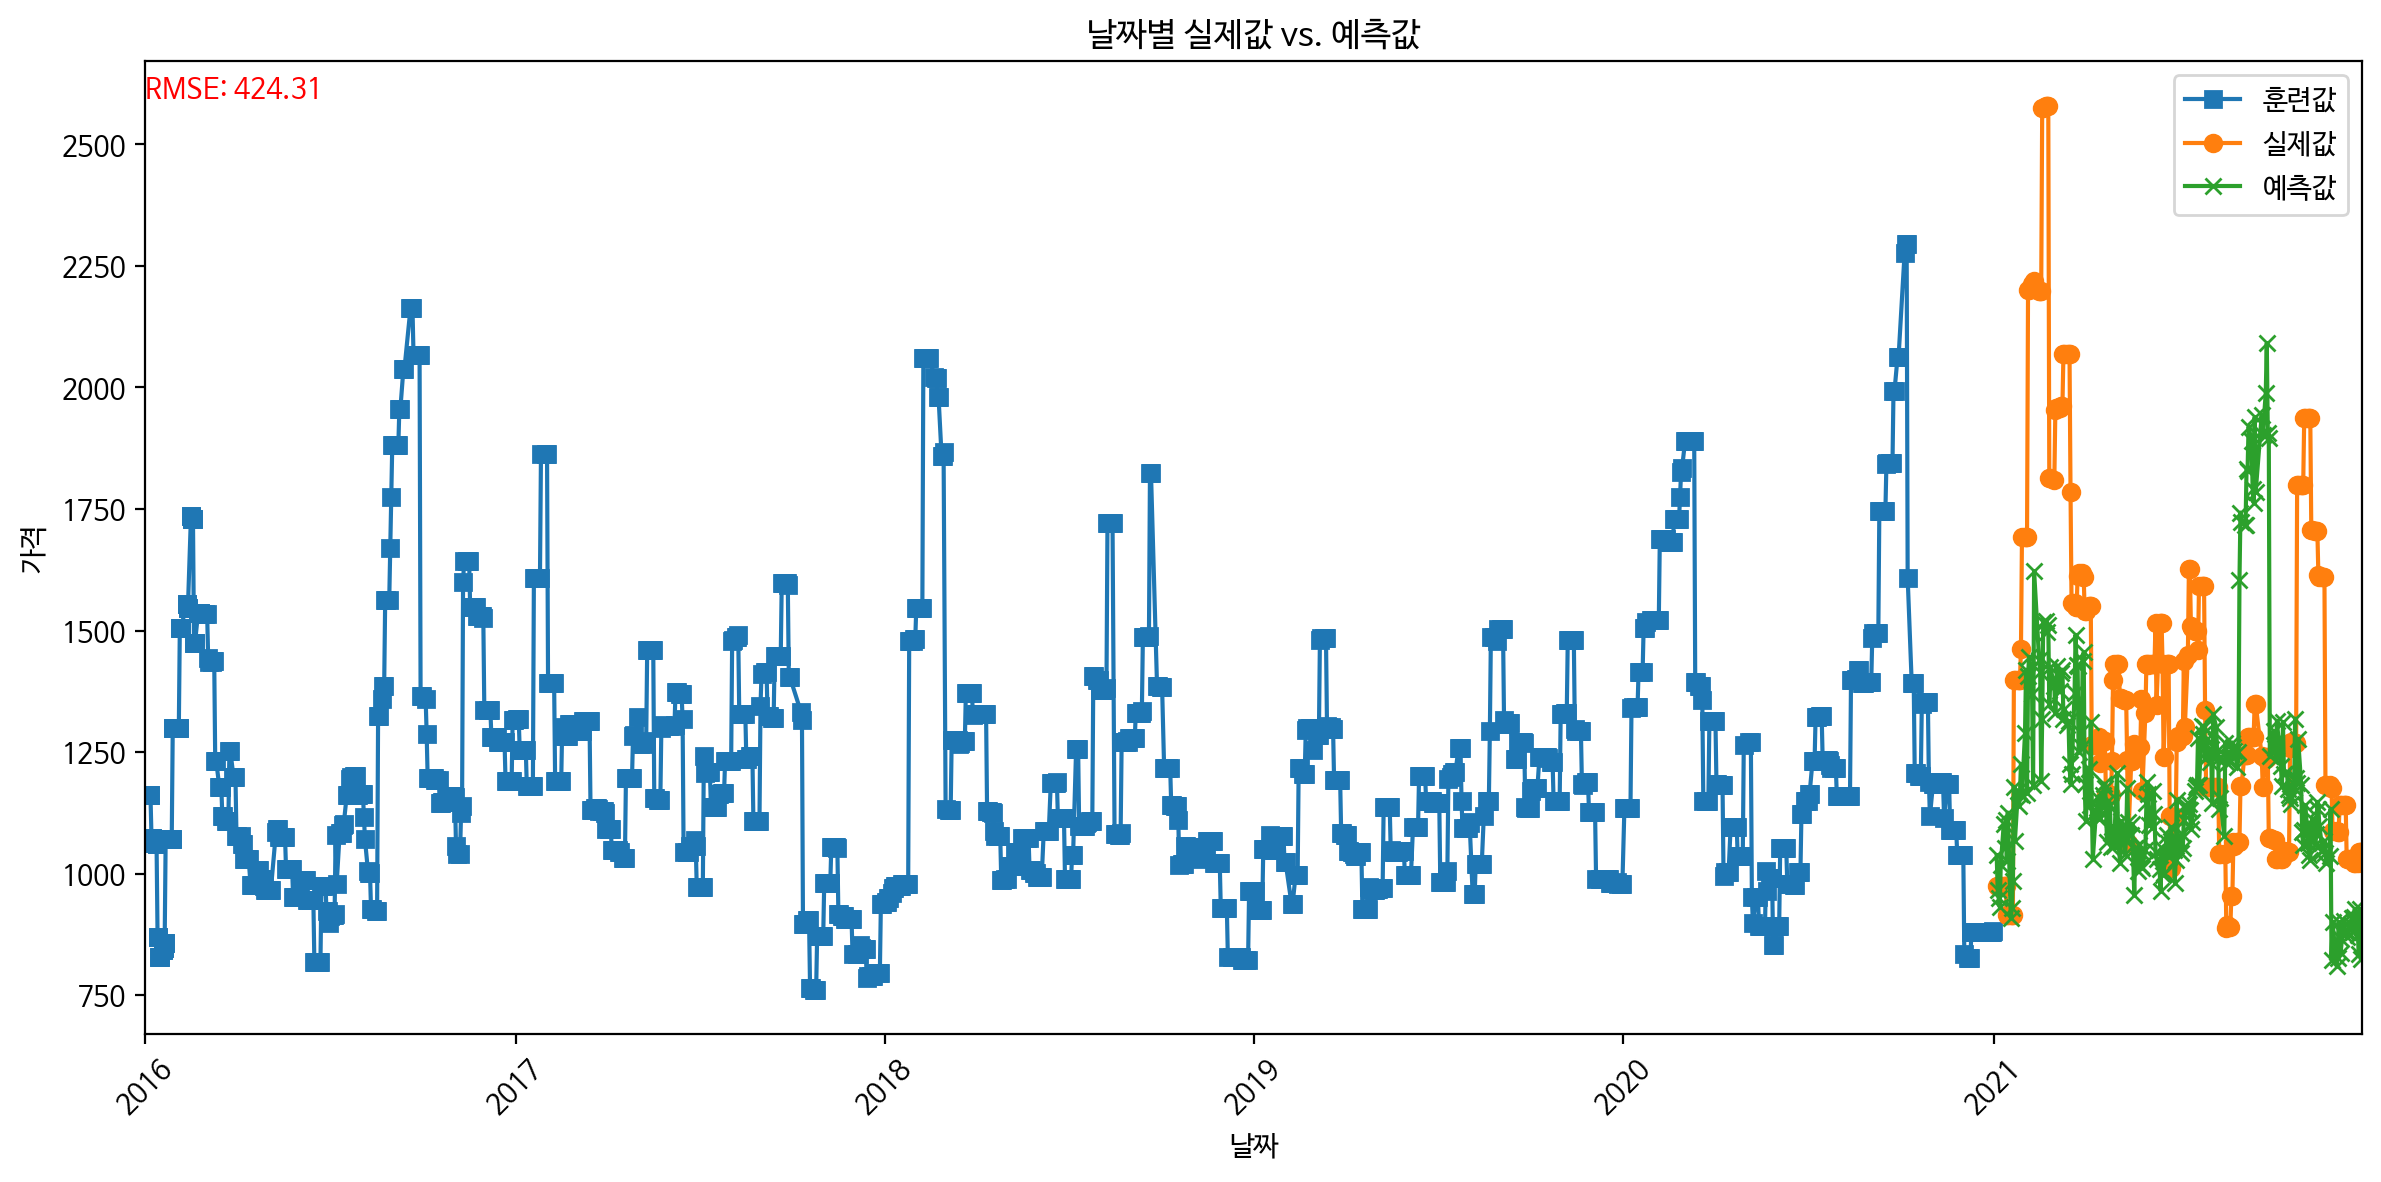

In [162]:
# 날짜 범위 설정
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2021-12-31')
# 날짜를 월별로 변환
test_data_dates = pd.to_datetime(test_data['날짜'])
test_data_months = test_data_dates.dt.to_period('M')
train_data_dates = pd.to_datetime(train_data['날짜'])
train_data_months = train_data_dates.dt.to_period('M')

plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2021-12-31')

# 라인 차트로 예측값과 실제값 그리기
plt.figure(figsize=(10, 6))
x_values = np.arange(len(test_y))
plt.plot(x_values, test_y, label='실제값', marker='o')
plt.plot(x_values, y_pred, label='예측값', marker='x')
plt.xlabel("샘플 인덱스")
plt.ylabel("가격")
plt.title("실제값 vs. 예측값")
plt.legend()
# 날짜별 예측값과 실제값 라인 차트로 그리기
plt.figure(figsize=(12, 6))
plt.plot(train_data_dates, train_y, label='훈련값', marker='s')
plt.plot(test_data_dates, test_y, label='실제값', marker='o')
plt.plot(test_data_dates, y_pred, label='예측값', marker='x')
plt.xlabel("날짜")
plt.ylabel("가격")
plt.title("날짜별 실제값 vs. 예측값")
plt.xticks(rotation=45)

# x축 범위 설정

plt.xlim(start_date, end_date)

# RMSE 값 표시
plt.text(start_date, max(test_y), f"RMSE: {rmse:.2f}", ha='left', va='bottom', color='red')

plt.legend()
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21250
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 112
[LightGBM] [Info] Start training from score 1210.591450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

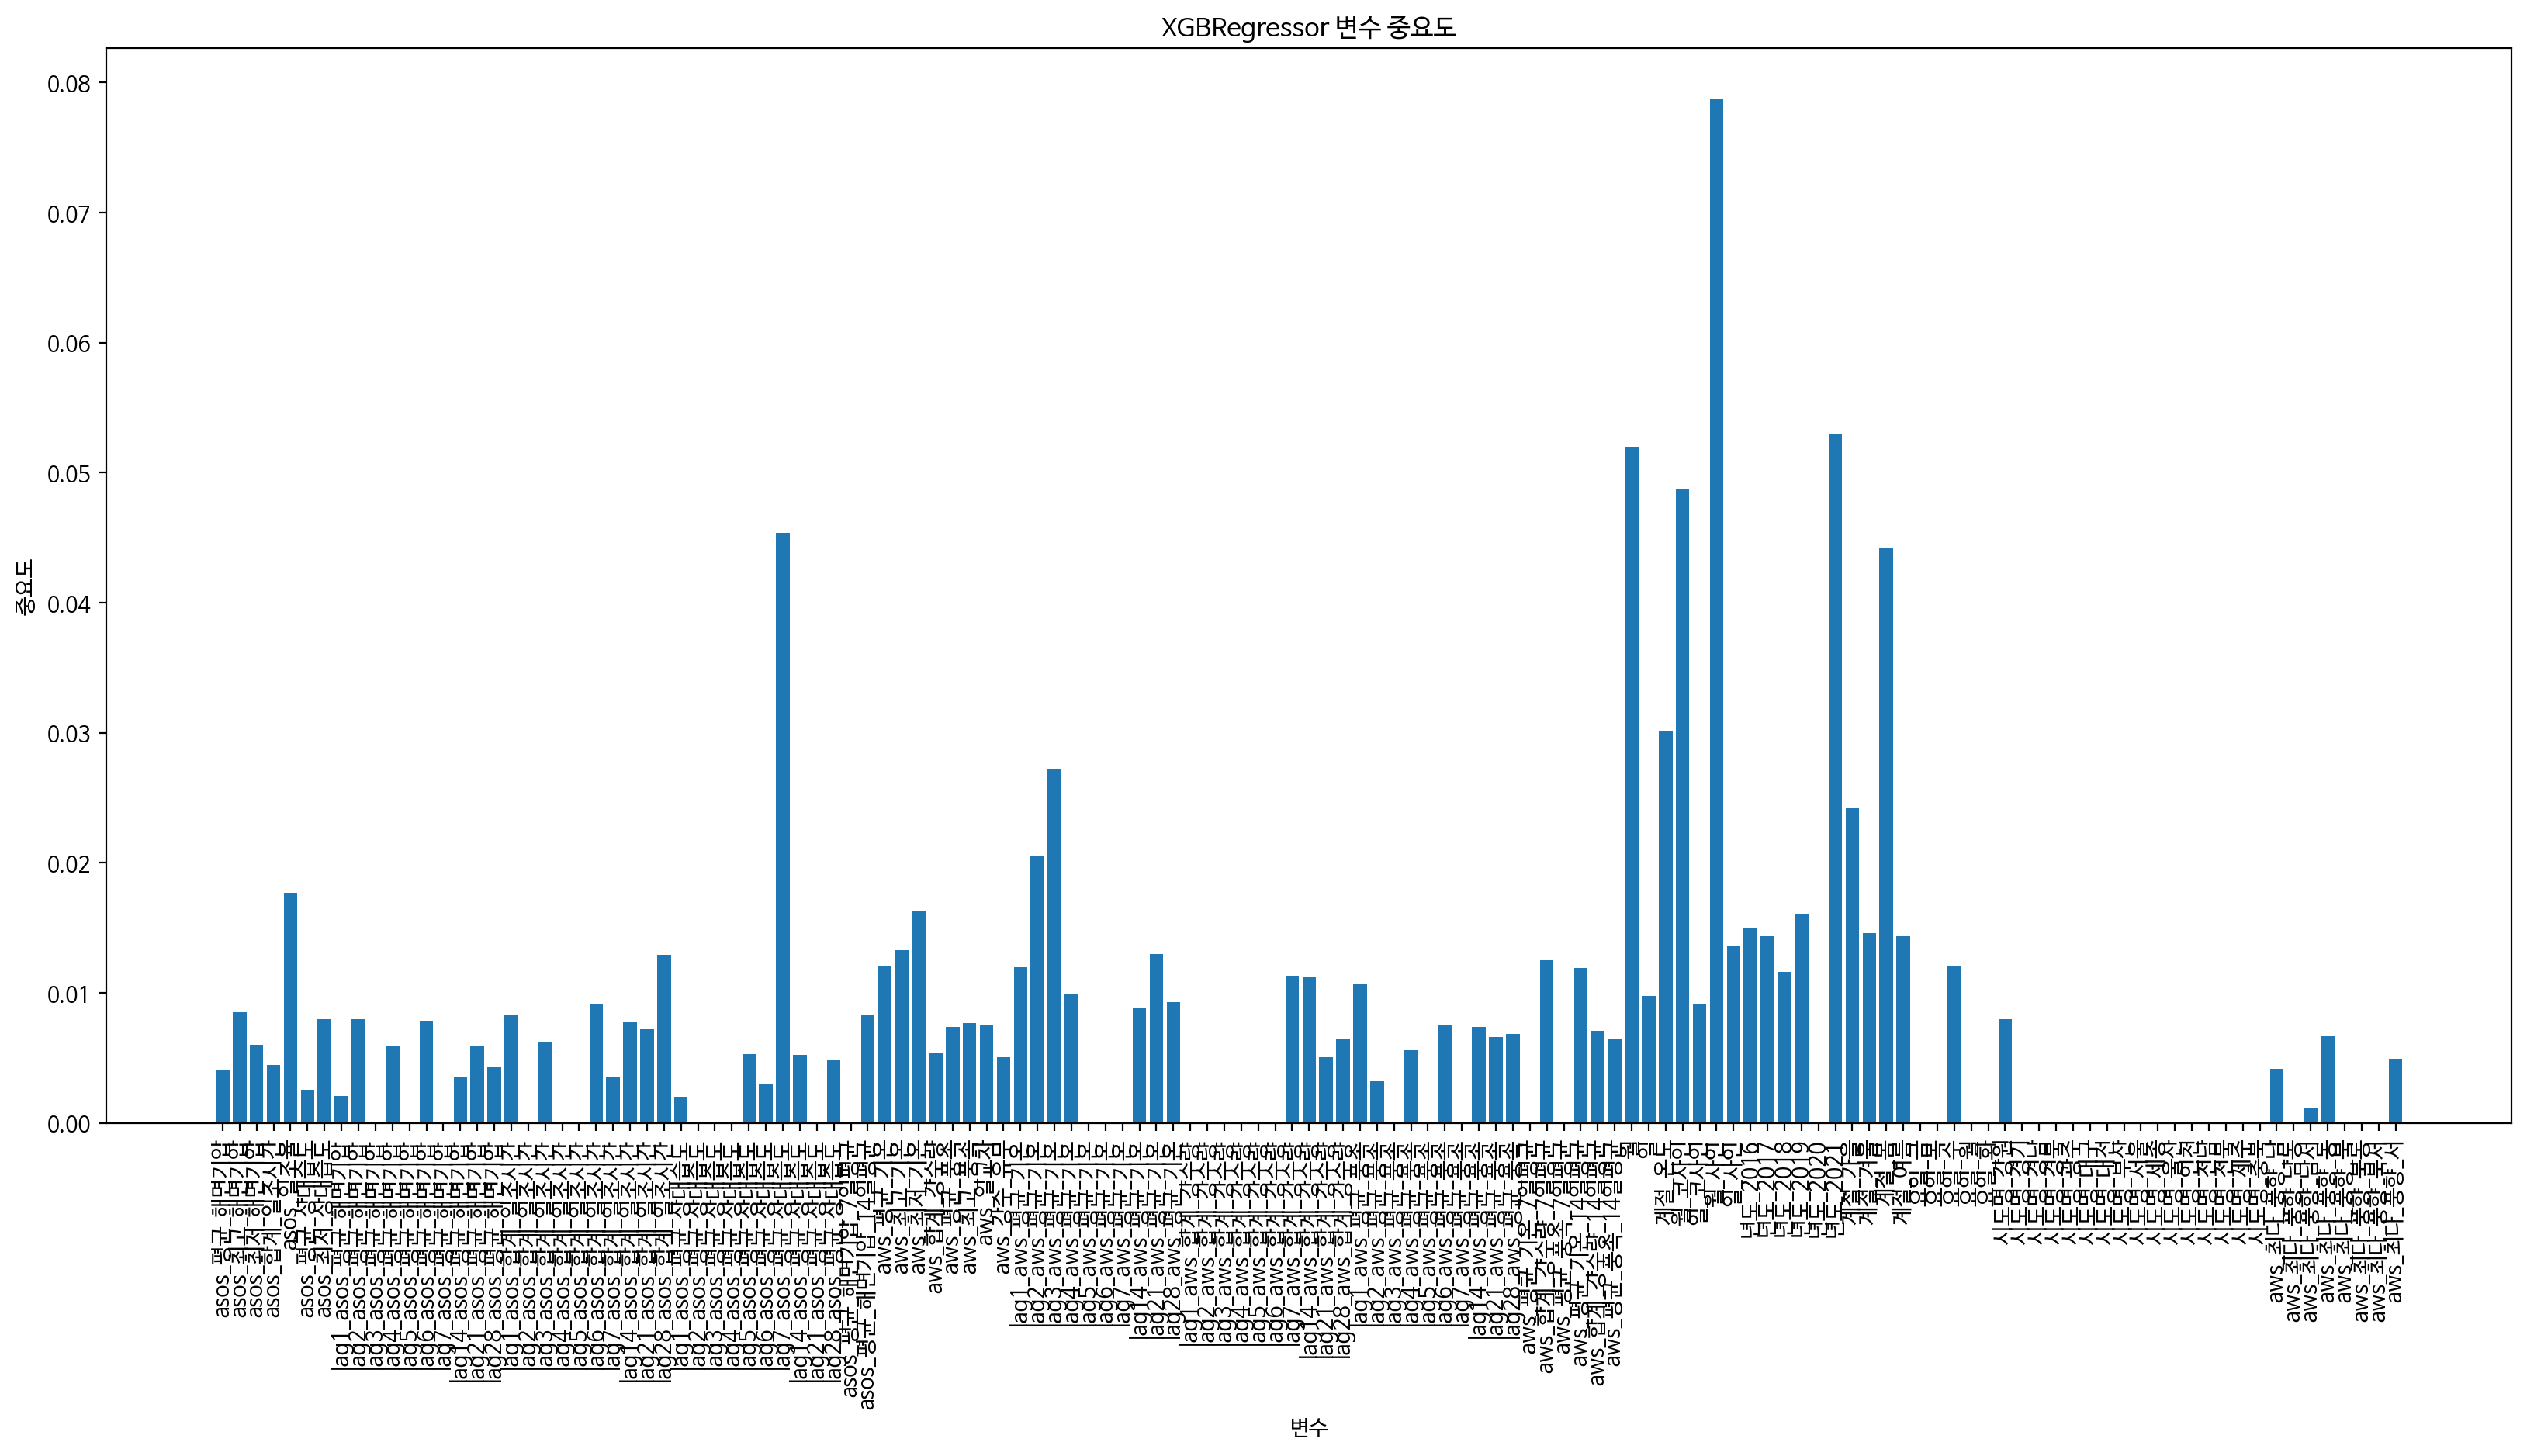

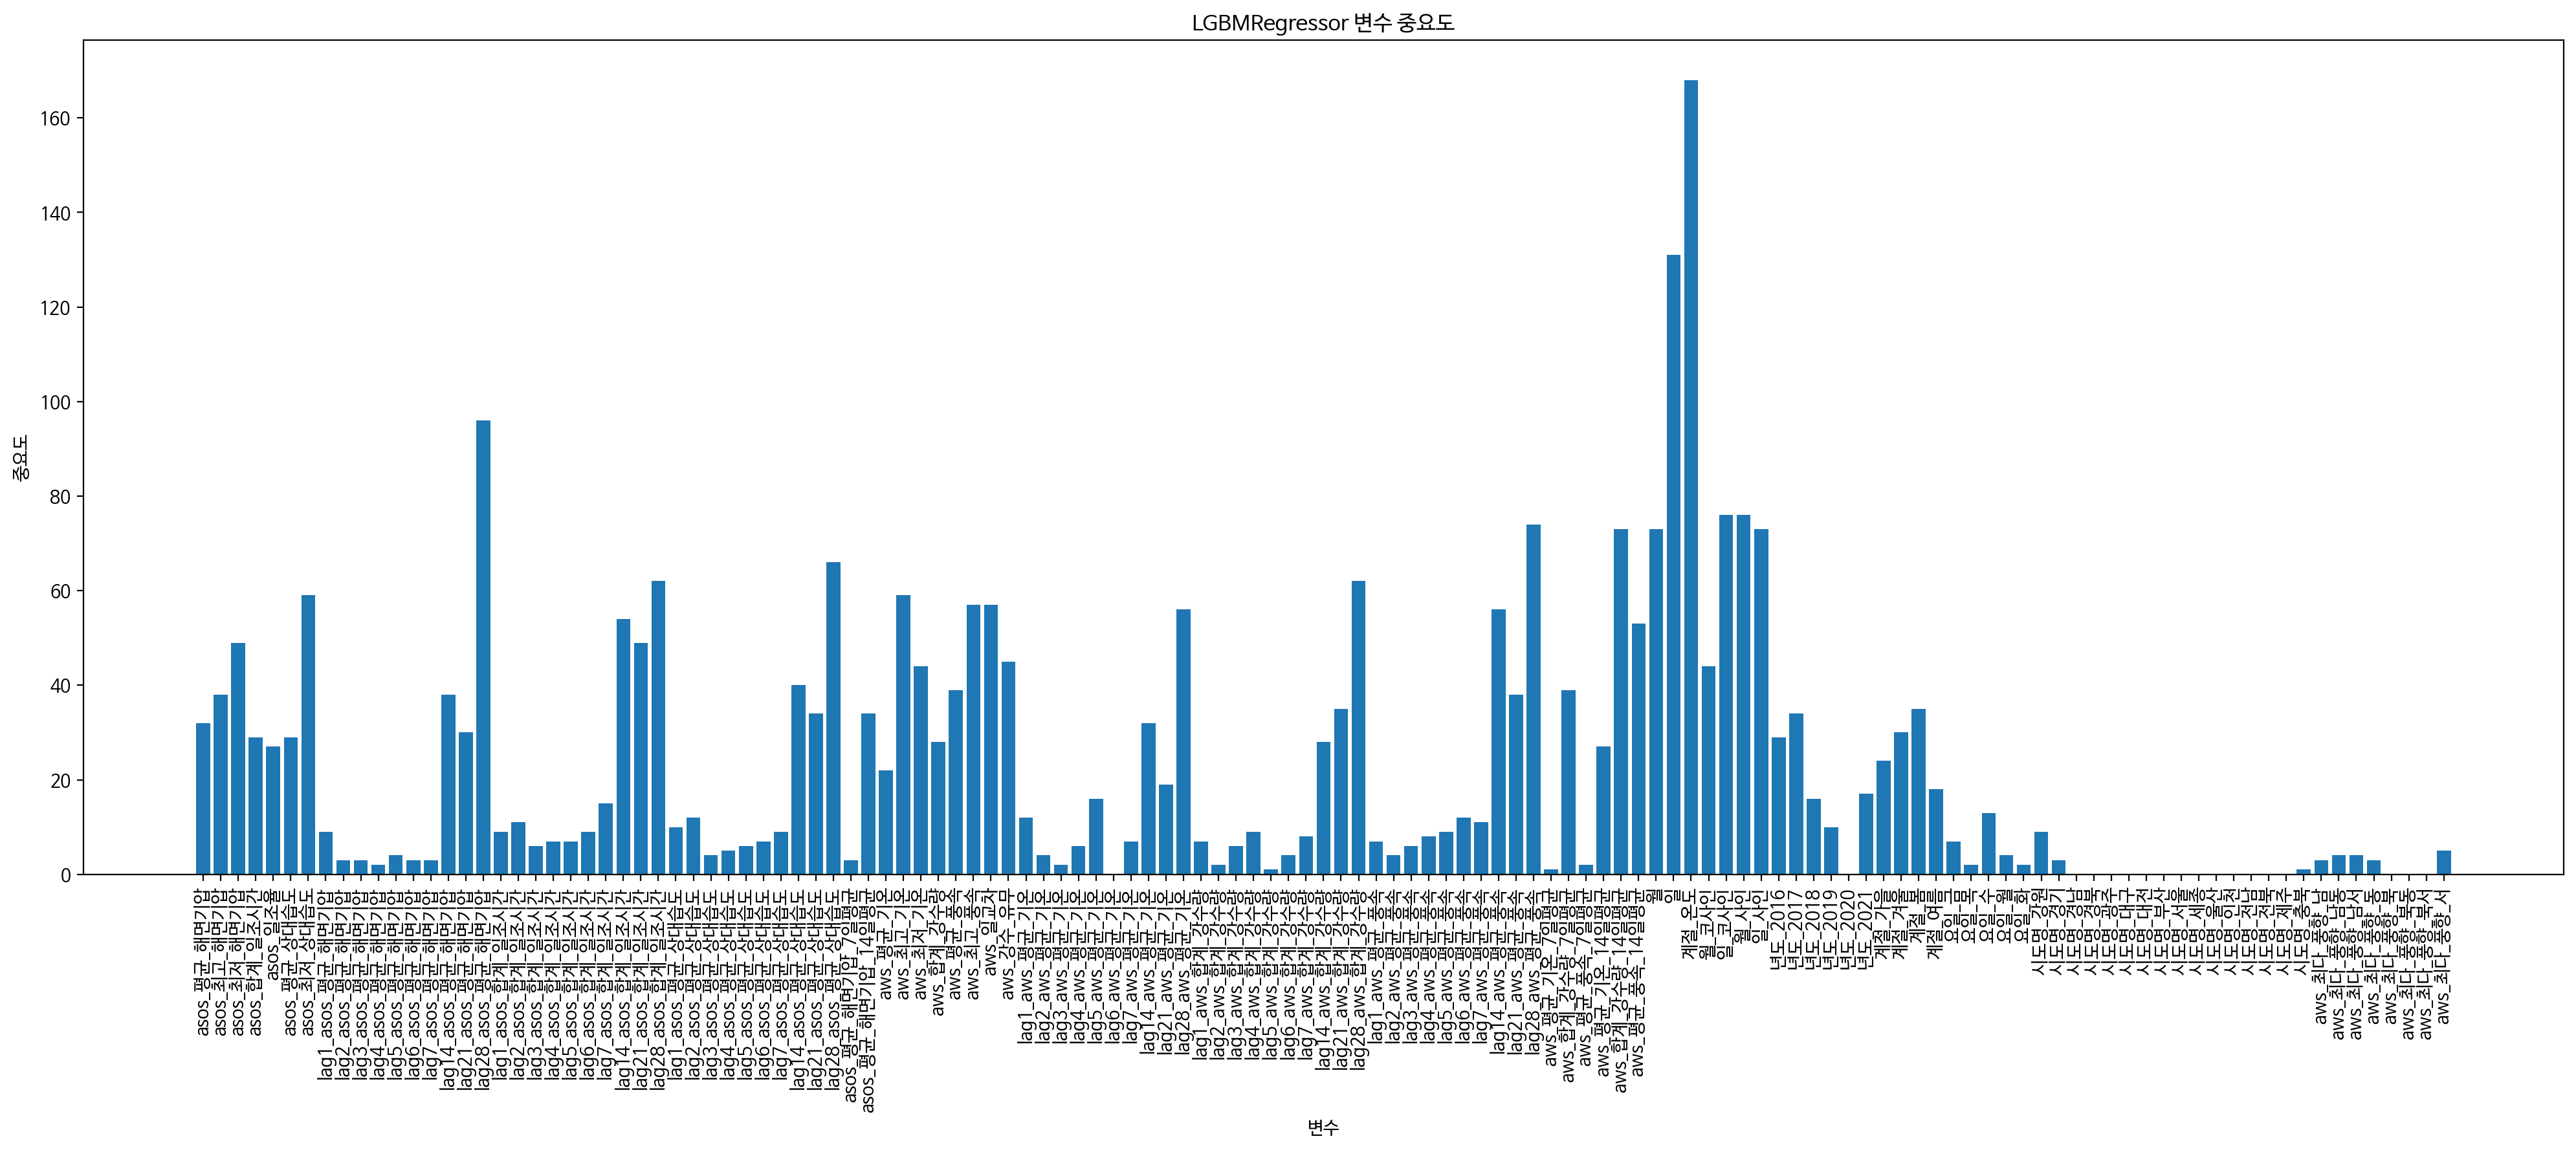

In [163]:
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 날짜 범위 설정
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2021-12-31')

train_data_d=train_data.drop(['날짜'],axis=1)
test_data_d=test_data.drop(['날짜'],axis=1)

train_x = train_data_d.drop(['가격'],axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'],axis=1)
test_y = test_data_d['가격']
# XGBRegressor 하이퍼파라미터 설정
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# LGBMRegressor 하이퍼파라미터 설정
lgbm_params = {
    'objective': 'regression',  # 회귀 문제의 경우
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'num_leaves': 32,
}

# XGBRegressor 모델 생성
model_xgb = xgb.XGBRegressor(**xgb_params)

# LGBMRegressor 모델 생성
model_lgb = lgb.LGBMRegressor(**lgbm_params)

# XGBRegressor 모델 학습
model_xgb.fit(train_x, train_y)

# LGBMRegressor 모델 학습
model_lgb.fit(train_x, train_y)

# 변수 중요도 추출
importance_xgb = model_xgb.feature_importances_
importance_lgb = model_lgb.feature_importances_



plt.figure(figsize=(20, 9))
# XGBRegressor 변수 중요도 그리기
plt.bar(range(len(importance_xgb)), importance_xgb)
plt.xticks(range(len(importance_xgb)), train_x.columns, rotation=90)
plt.xlabel("변수")
plt.ylabel("중요도")
plt.title("XGBRegressor 변수 중요도")

# 새로운 그림을 그리기 위해 plt.figure 다시 사용
plt.figure(figsize=(20, 9))

# LGBMRegressor 변수 중요도 그리기
plt.bar(range(len(importance_lgb)), importance_lgb)
plt.xticks(range(len(importance_lgb)), train_x.columns, rotation=90)
plt.xlabel("변수")
plt.ylabel("중요도")
plt.title("LGBMRegressor 변수 중요도")

plt.tight_layout()
plt.show()


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21250
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 112
[LightGBM] [Info] Start training from score 1210.591450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

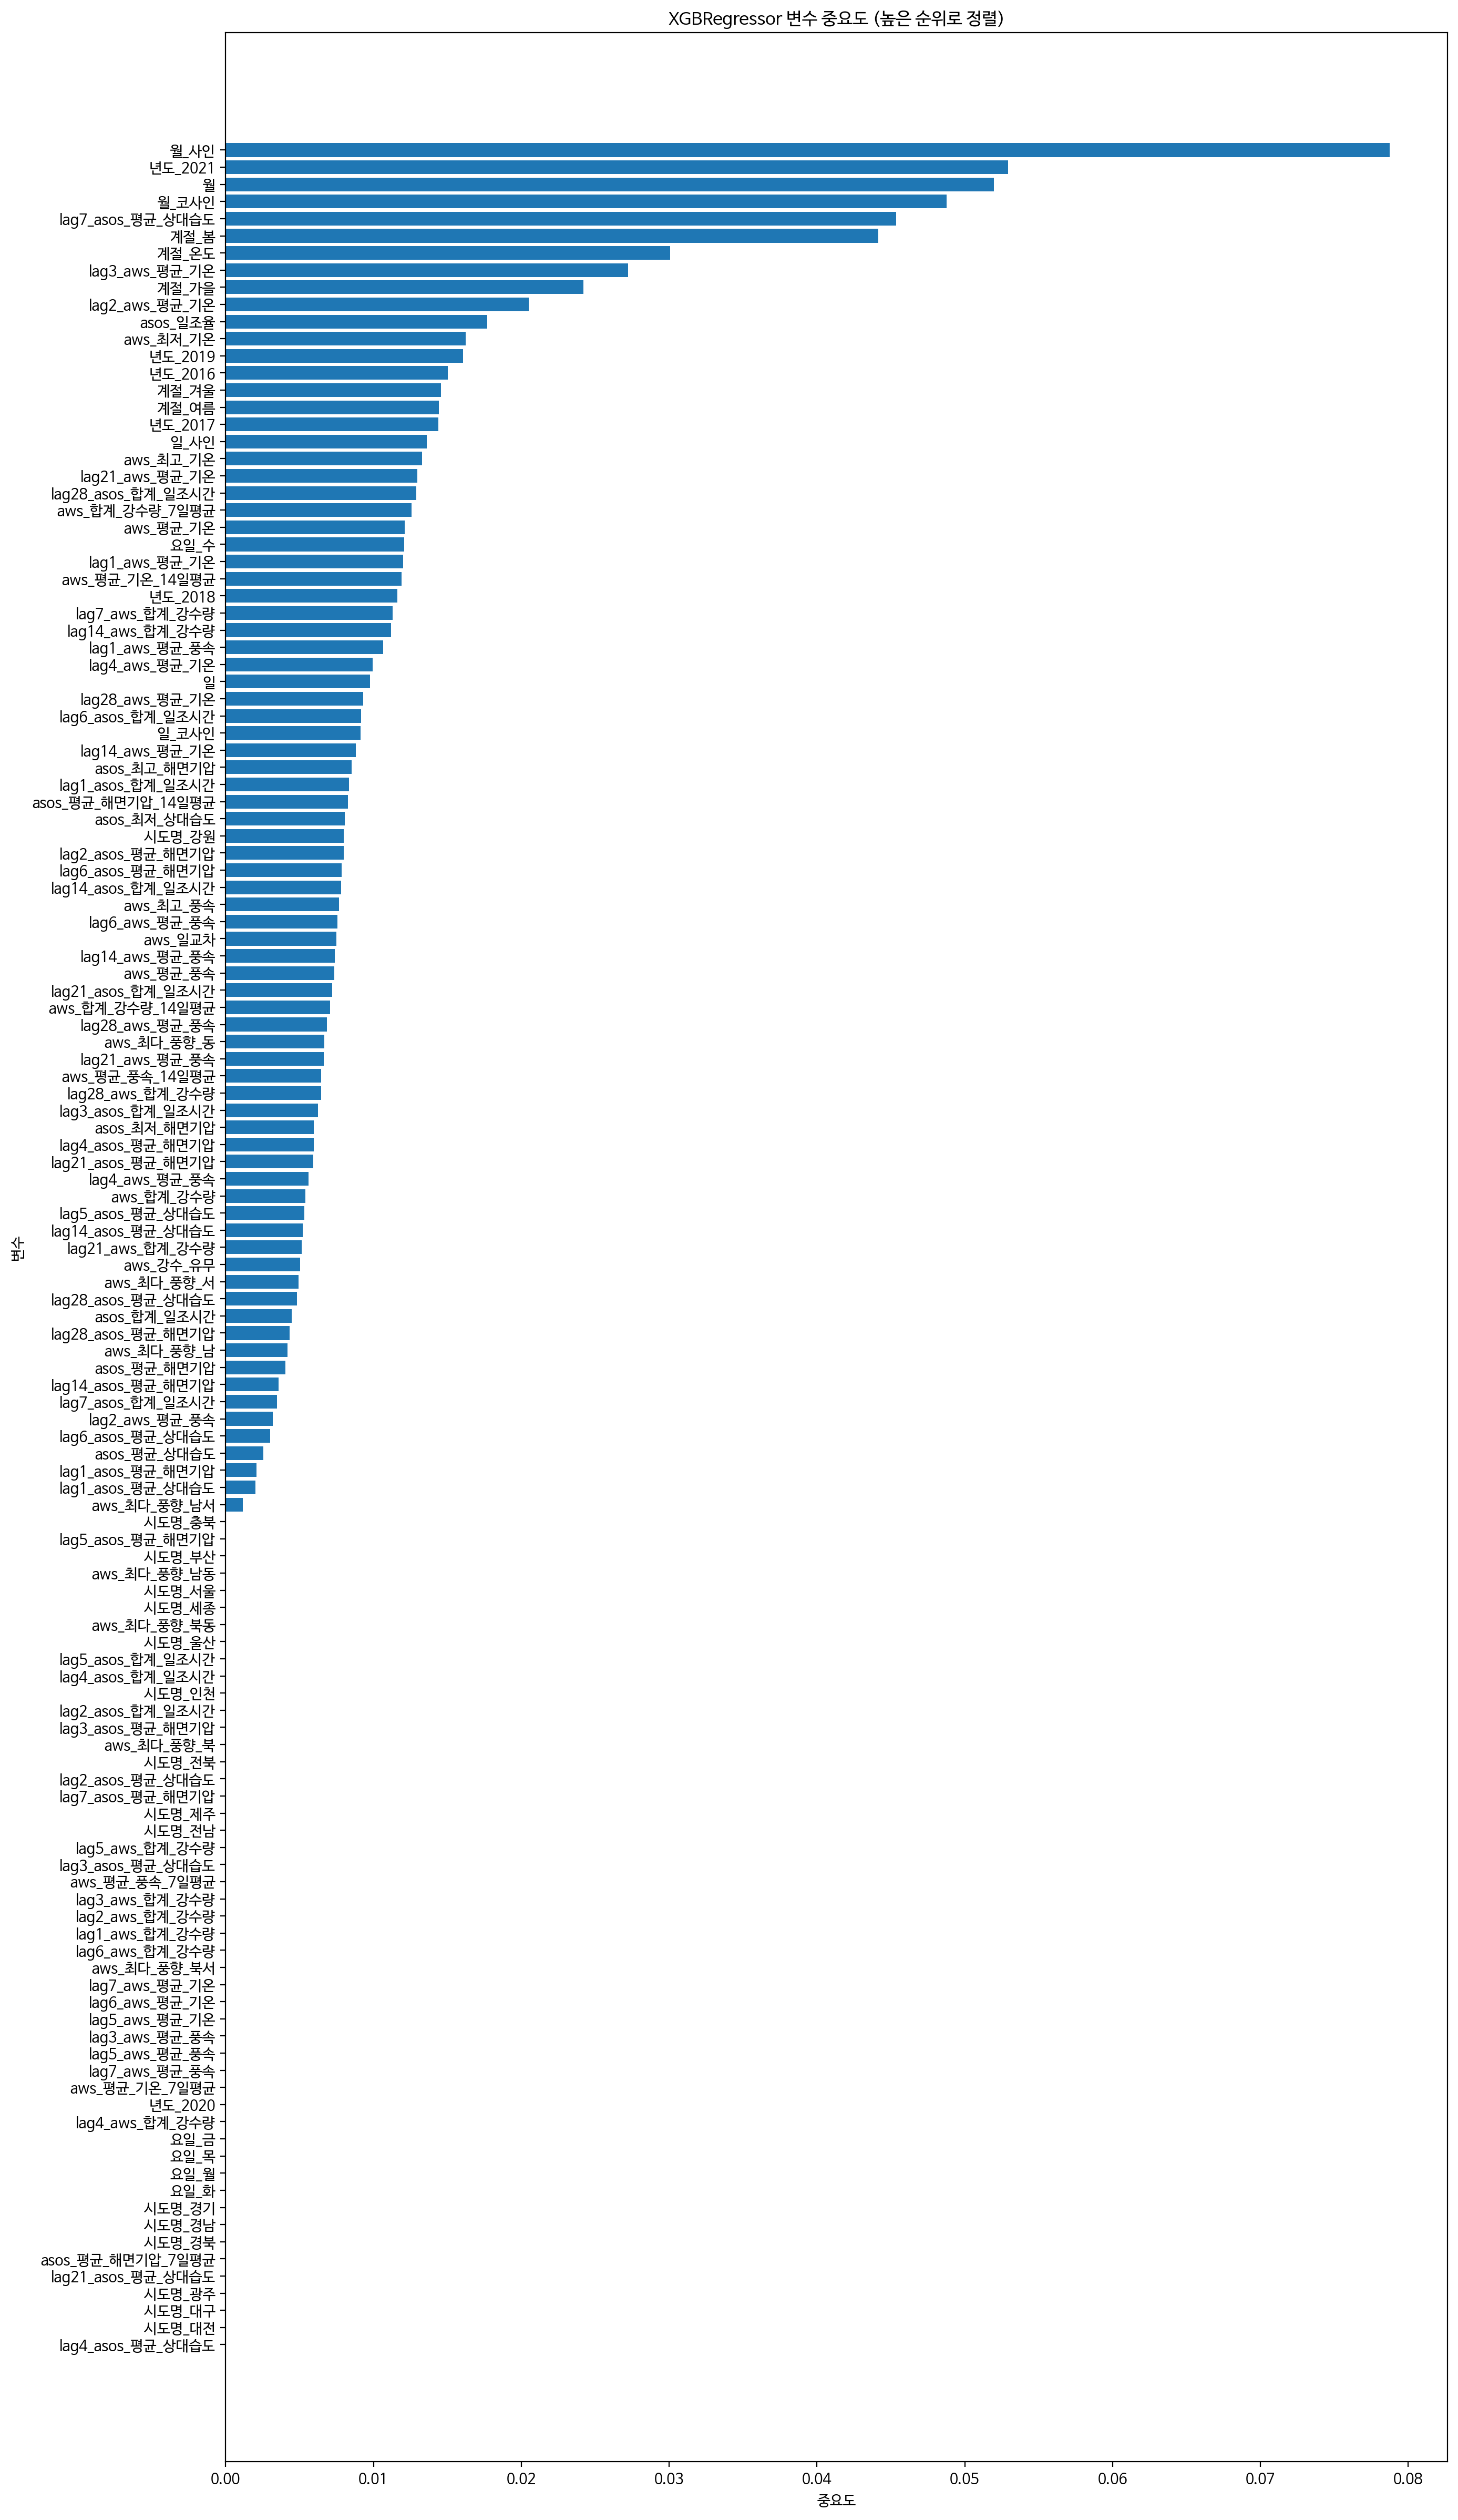

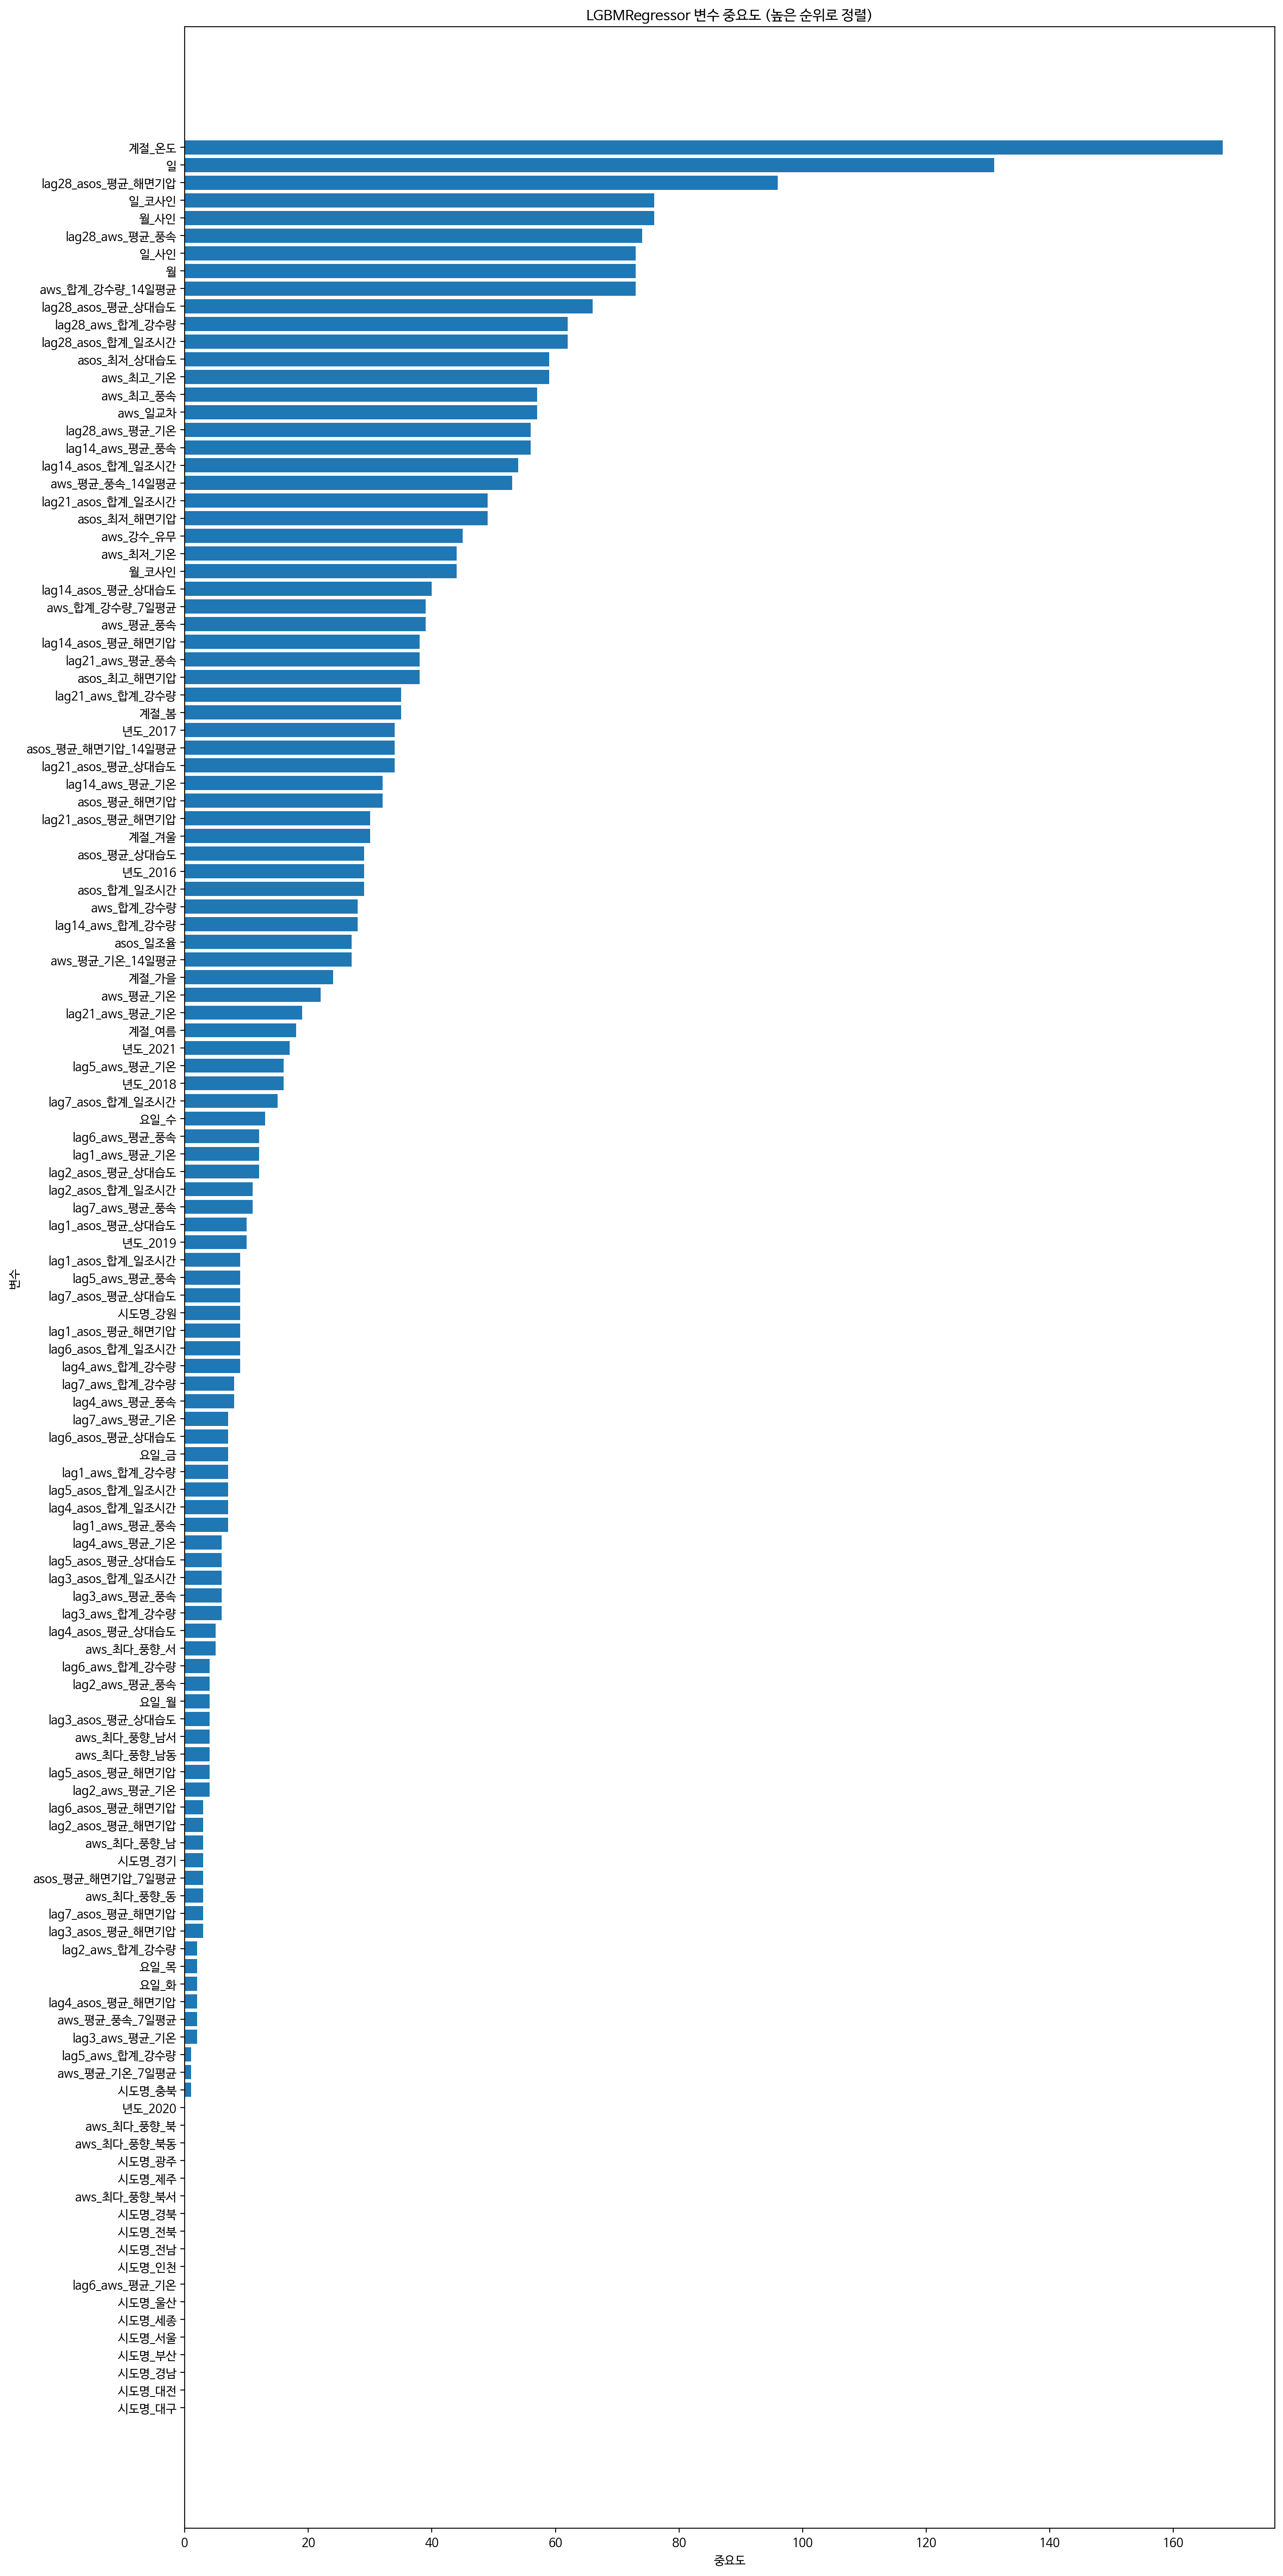

In [164]:
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 날짜 범위 설정
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2021-12-31')

train_data_d=train_data.drop(['날짜'],axis=1)
test_data_d=test_data.drop(['날짜'],axis=1)

train_x = train_data_d.drop(['가격'],axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'],axis=1)
test_y = test_data_d['가격']
# XGBRegressor 하이퍼파라미터 설정
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# LGBMRegressor 하이퍼파라미터 설정
lgbm_params = {
    'objective': 'regression',  # 회귀 문제의 경우
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'num_leaves': 32,
}

# XGBRegressor 모델 생성
model_xgb = xgb.XGBRegressor(**xgb_params)

# LGBMRegressor 모델 생성
model_lgb = lgb.LGBMRegressor(**lgbm_params)

# XGBRegressor 모델 학습
model_xgb.fit(train_x, train_y)

# LGBMRegressor 모델 학습
model_lgb.fit(train_x, train_y)

# 변수 중요도 추출
importance_xgb = model_xgb.feature_importances_
importance_lgb = model_lgb.feature_importances_

# 변수 중요도 내림차순으로 정렬
sorted_idx_xgb = np.argsort(importance_xgb)[::+1]
sorted_idx_lgb = np.argsort(importance_lgb)[::+1]

# XGBRegressor 변수 중요도 그리기 (x축과 y축 서로 바꾸고 정렬)
plt.figure(figsize=(15, 30))
plt.barh(range(len(importance_xgb)), importance_xgb[sorted_idx_xgb])
plt.yticks(range(len(importance_xgb)), train_x.columns[sorted_idx_xgb])
plt.xlabel("중요도")
plt.ylabel("변수")
plt.title("XGBRegressor 변수 중요도 (높은 순위로 정렬)")

# LGBMRegressor 변수 중요도 그리기 (x축과 y축 서로 바꾸고 정렬)
plt.figure(figsize=(15,30))
plt.barh(range(len(importance_lgb)), importance_lgb[sorted_idx_lgb])
plt.yticks(range(len(importance_lgb)), train_x.columns[sorted_idx_lgb])
plt.xlabel("중요도")
plt.ylabel("변수")
plt.title("LGBMRegressor 변수 중요도 (높은 순위로 정렬)")

plt.tight_layout()
plt.show()


In [165]:
sorted_idx_xgb = np.argsort(importance_xgb)[::-1]
sorted_idx_lgb = np.argsort(importance_lgb)[::-1]

pd.set_option('display.float_format', '{:.4f}'.format)
# 소수점 이하 4자리까지 출력

# 변수 이름과 중요도 값을 DataFrame으로 정리
xgb_feature_importance = pd.DataFrame({
    '변수': train_x.columns[sorted_idx_xgb],
    'XGBRegressor 중요도': importance_xgb[sorted_idx_xgb],
    'XGBRegressor 순위': range(1, len(importance_xgb) + 1)
})

lgb_feature_importance = pd.DataFrame({
    '변수': train_x.columns[sorted_idx_lgb],
    'LGBMRegressor 중요도': importance_lgb[sorted_idx_lgb],
    'LGBMRegressor 순위': range(1, len(importance_lgb) + 1)
})

# 상위 15개 변수 중요도 출력
print("XGBoost 변수 중요도 (상위 15개):")
print(xgb_feature_importance.head(15))

print("\nLightGBM 변수 중요도 (상위 15개):")
print(lgb_feature_importance.head(15))


XGBoost 변수 중요도 (상위 15개):
                   변수  XGBRegressor 중요도  XGBRegressor 순위
0                월_사인            0.0787                1
1             년도_2021            0.0529                2
2                   월            0.0520                3
3               월_코사인            0.0488                4
4   lag7_asos_평균_상대습도            0.0454                5
5                계절_봄            0.0442                6
6               계절_온도            0.0301                7
7      lag3_aws_평균_기온            0.0272                8
8               계절_가을            0.0242                9
9      lag2_aws_평균_기온            0.0205               10
10           asos_일조율            0.0177               11
11          aws_최저_기온            0.0162               12
12            년도_2019            0.0161               13
13            년도_2016            0.0150               14
14              계절_겨울            0.0146               15

LightGBM 변수 중요도 (상위 15개):
                    변수  LGBMRegresso

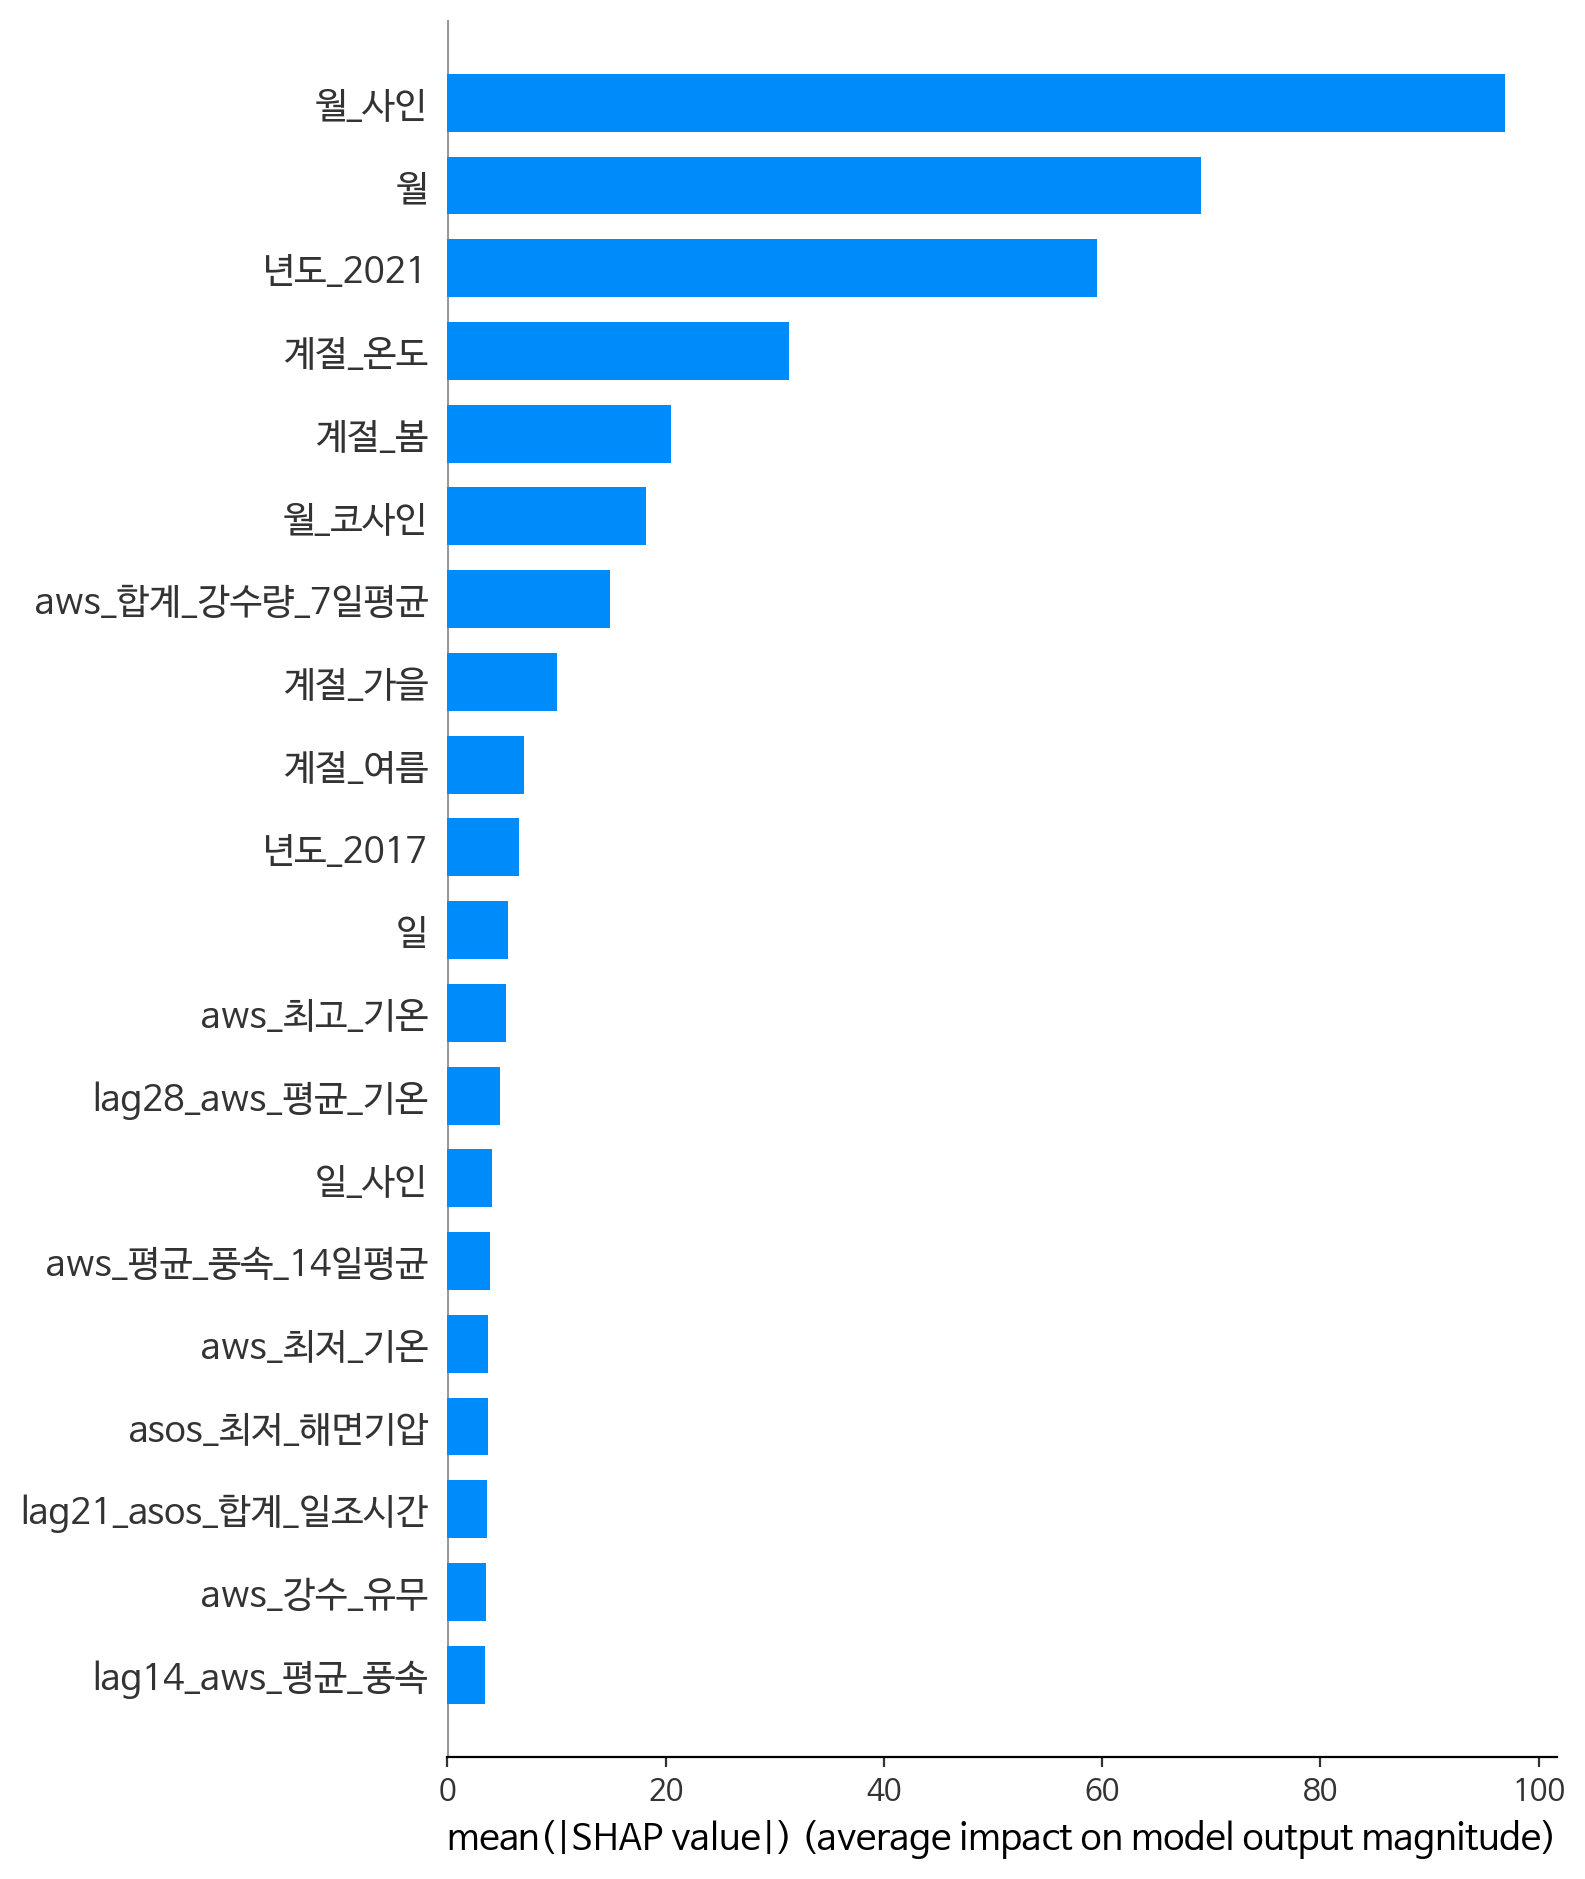

In [166]:
import shap
import matplotlib.pyplot as plt

# SHAP TreeExplainer 계산을 위한 준비
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(test_x)

explainer_lgb = shap.TreeExplainer(model_lgb)
shap_values_lgb = explainer_lgb.shap_values(test_x)

# SHAP 값 시각화
shap.summary_plot(shap_values_xgb, test_x, plot_type="bar", title="XGBoost SHAP 변수 중요도")

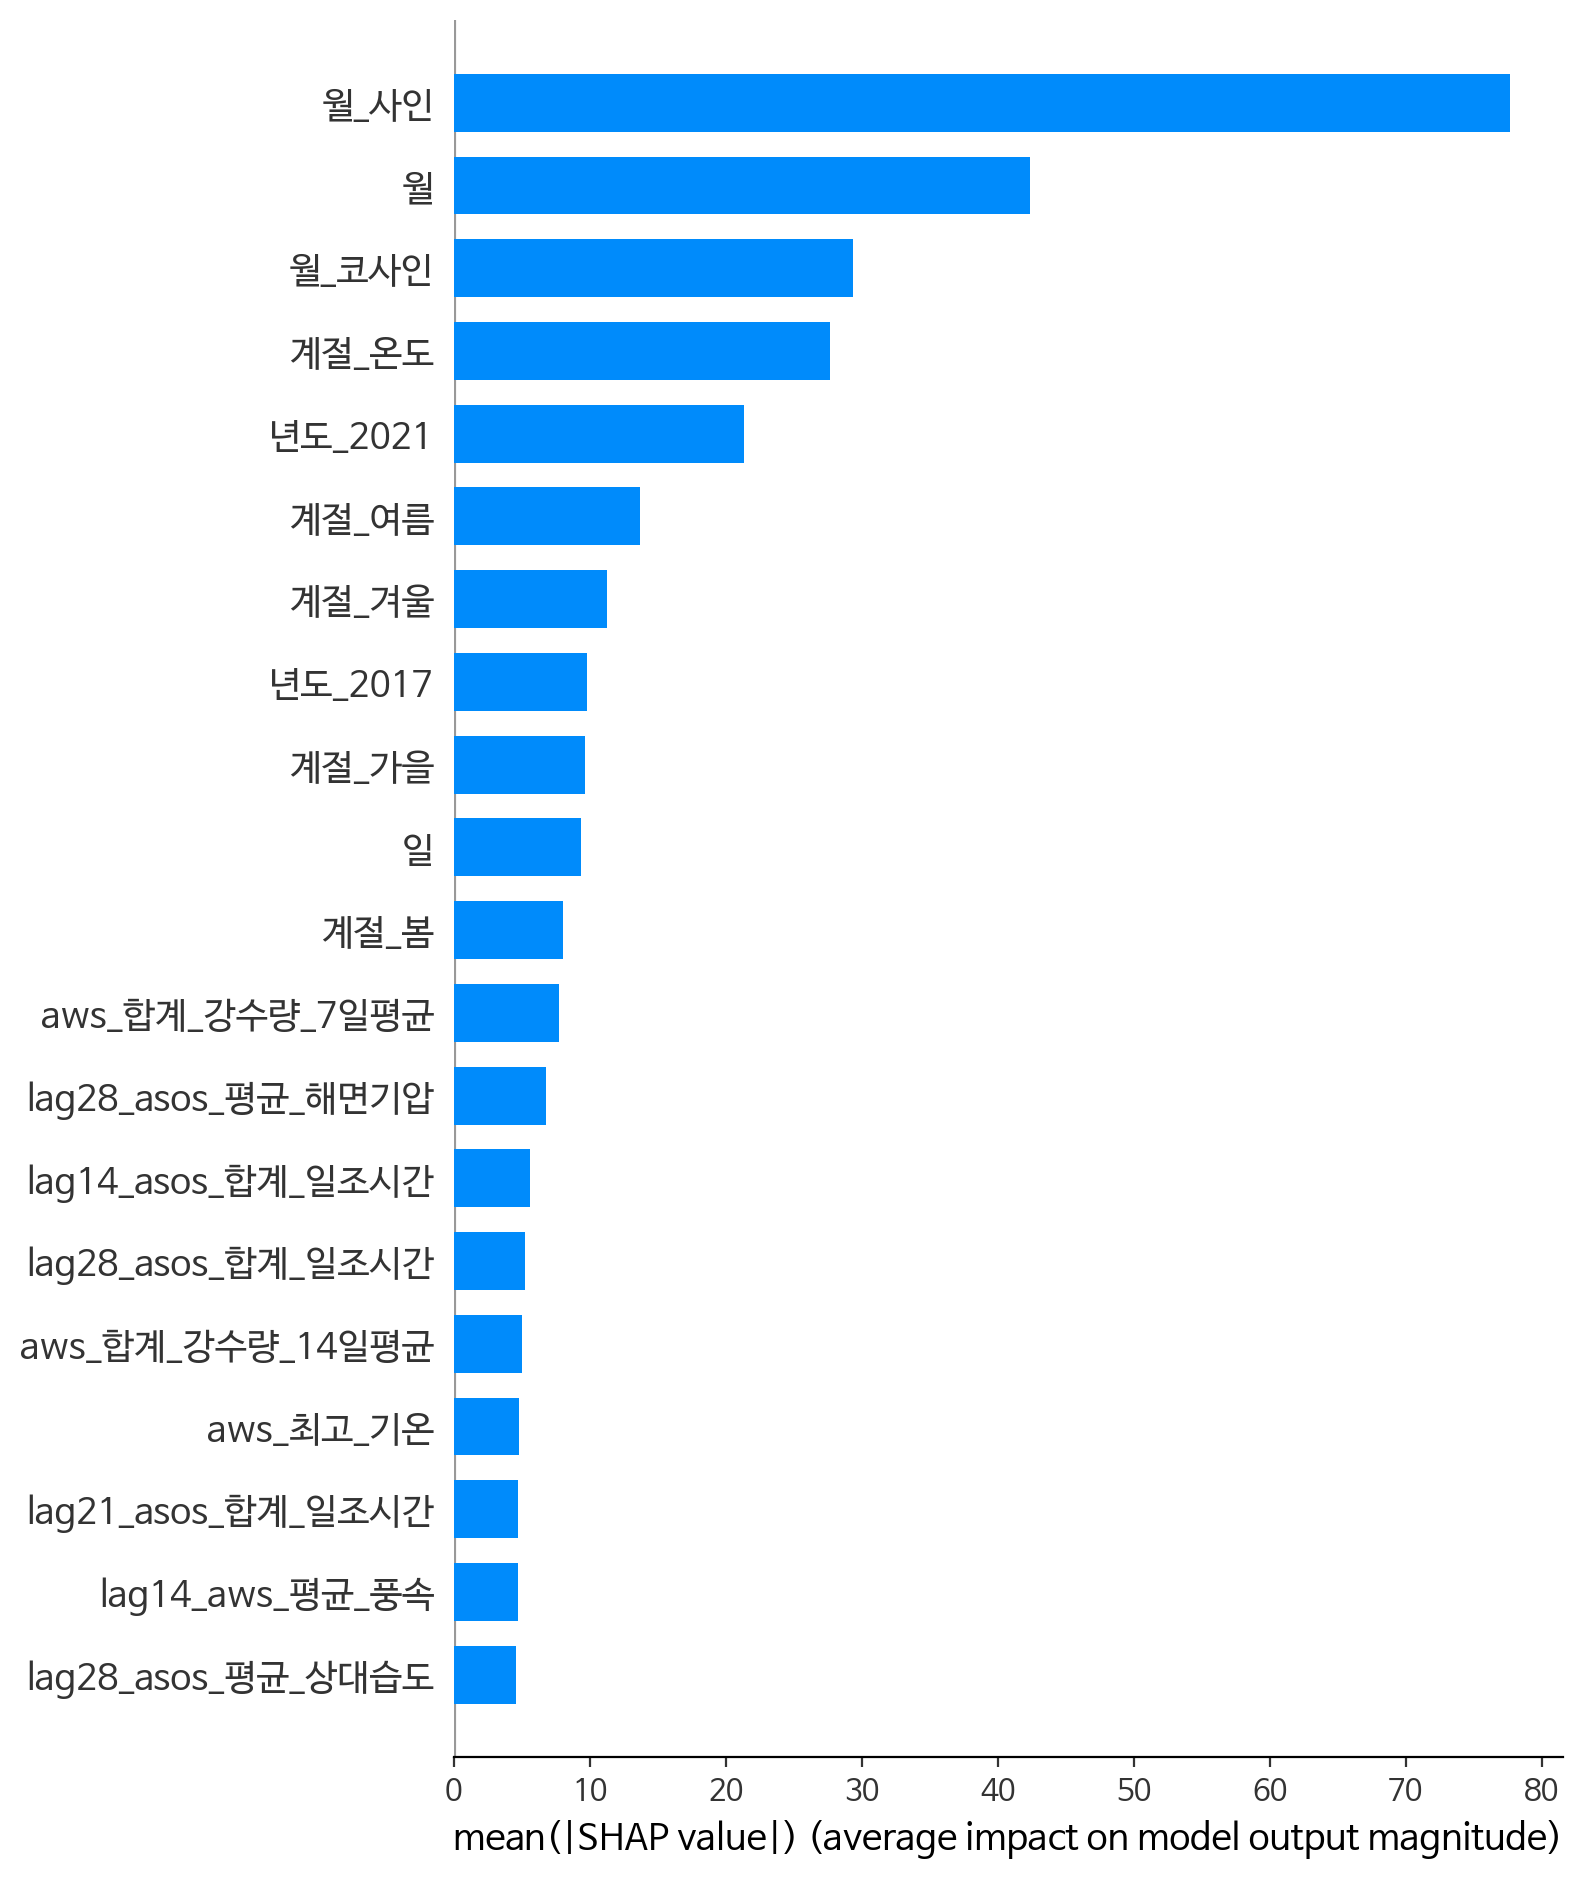

In [167]:
shap.summary_plot(shap_values_lgb, test_x, plot_type="bar", title="LightGBM SHAP 변수 중요도")

In [168]:
import shap

# SHAP TreeExplainer 계산을 위한 준비
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(test_x)

explainer_lgb = shap.TreeExplainer(model_lgb)
shap_values_lgb = explainer_lgb.shap_values(test_x)

# XGBoost 모델의 SHAP 변수 중요도 정리
shap_df_xgb = pd.DataFrame(shap_values_xgb, columns=test_x.columns)
shap_summary_xgb = shap_df_xgb.abs().mean().sort_values(ascending=False).head(15)

# LightGBM 모델의 SHAP 변수 중요도 정리
shap_df_lgb = pd.DataFrame(shap_values_lgb, columns=test_x.columns)
shap_summary_lgb = shap_df_lgb.abs().mean().sort_values(ascending=False).head(15)

print("XGBoost SHAP 변수 중요도 (상위 15개):")
print(shap_summary_xgb)

print("\nLightGBM SHAP 변수 중요도 (상위 15개):")
print(shap_summary_lgb)


XGBoost SHAP 변수 중요도 (상위 15개):
월_사인              96.8820
월                 69.1054
년도_2021           59.5083
계절_온도             31.2574
계절_봄              20.5041
월_코사인             18.1569
aws_합계_강수량_7일평균   14.9346
계절_가을             10.0173
계절_여름              6.9756
년도_2017            6.5558
일                  5.5216
aws_최고_기온          5.3515
lag28_aws_평균_기온    4.8159
일_사인               4.0404
aws_평균_풍속_14일평균    3.8879
dtype: float32

LightGBM SHAP 변수 중요도 (상위 15개):
월_사인                 77.6750
월                    42.3907
월_코사인                29.3717
계절_온도                27.6983
년도_2021              21.3849
계절_여름                13.7378
계절_겨울                11.2840
년도_2017               9.8224
계절_가을                 9.6283
일                     9.3890
계절_봄                  8.0290
aws_합계_강수량_7일평균       7.7290
lag28_asos_평균_해면기압    6.7716
lag14_asos_합계_일조시간    5.6356
lag28_asos_합계_일조시간    5.2657
dtype: float64
